In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sample_submission = pd.read_csv("../input/lish-moa/sample_submission.csv")

In [3]:
sample_submission.columns
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: float64(206), object(1)
memory usage: 6.3+ MB


# Train Data Preprocess

In [4]:
train_features = pd.read_csv("../input/lish-moa/train_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")

In [5]:
# join train_features and non_scored_forTrain
non_scored = pd.merge(train_targets_nonscored,train_features,on="sig_id", how="inner")


In [6]:

score ={"score":non_scored.iloc[:,1:403].sum(axis=1)}

In [7]:
score=pd.DataFrame(data = score)
non_scored = pd.concat([non_scored,score],axis=1)
non_scored = non_scored[non_scored["score"]>0]


In [8]:

 non_scored_forTrain = pd.concat([non_scored.iloc[:,0],non_scored.iloc[:,403:1278]],axis=1)


In [9]:
print(non_scored_forTrain.shape)
print(train_features.shape)
print(non_scored_forTrain.head())
print(train_features.head())

(4590, 876)
(23814, 876)
          sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
6   id_001bd861f  trt_cp       24      D2  2.0440  1.7000 -1.5390  5.9440   
14  id_002d31e2c  trt_cp       72      D1  0.4242  1.7040 -1.3230 -0.3163   
31  id_0063cd461  trt_cp       48      D2 -0.2149 -0.3405 -1.1210 -0.8598   
43  id_00849b0f8  trt_cp       48      D2 -0.6823 -0.2151  0.4651  0.7460   
46  id_008a18cef  trt_cp       72      D2  0.6492  0.5022  1.0700 -0.3310   

       g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
6  -2.1670 -4.0360  ...  0.1855  1.1720  0.8325  0.6486  0.8090  1.5880   
14 -0.4642 -2.3810  ... -5.9590 -0.6440 -0.3461 -4.9490 -1.1380 -5.2000   
31 -0.2194 -0.1063  ...  0.8775 -0.0593 -0.1088 -0.9292  0.7622 -0.4656   
43 -0.1309 -2.1210  ... -1.0050 -0.0415  0.4463 -0.9005 -0.3040  0.2185   
46  0.3905  0.4721  ... -0.2043 -0.8350  0.1896  0.1787 -0.6268 -0.2938   

      c-96    c-97    c-98    c-99  
6   2.4670  0.0357  0.13

In [10]:
train_features = pd.concat([train_features, non_scored_forTrain])

In [11]:
train_features_labels = pd.merge(train_features,train_targets_nonscored, how="left", on="sig_id")
train_features_labels = pd.merge(train_features,train_targets_scored, how="left", on="sig_id")

In [12]:
train_features_labels

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28399,id_ffaac2669,trt_cp,48,D2,0.9666,0.8059,1.3720,0.1972,0.1620,-0.5821,...,0,0,0,0,0,0,0,0,0,0
28400,id_ffab8a71d,trt_cp,72,D2,-0.3375,-1.2220,-0.5480,0.5279,-0.3146,0.2511,...,0,0,0,0,0,0,0,0,0,0
28401,id_ffdd24c81,trt_cp,72,D2,-1.1810,-0.5206,0.0939,0.2877,-0.8058,0.3327,...,0,0,0,0,0,0,0,0,0,0
28402,id_fff26b3c2,trt_cp,24,D2,0.3480,0.8765,-0.7967,-0.3478,-0.1713,0.0767,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_features = train_features_labels.iloc[:,1:876]

In [14]:
train_features.shape

(28404, 875)

In [15]:
train_labels = train_features_labels.iloc[:,876:1082]
train_labels.shape

(28404, 206)

### PCA train

In [16]:
# PCA ------train-------------
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#train_features.iloc[:,3:875]
pca = PCA(n_components=80) 
pca.fit(train_features.iloc[:,3:875])

PCA(n_components=80)

type: <class 'numpy.ndarray'>
shape:  (28404, 80)


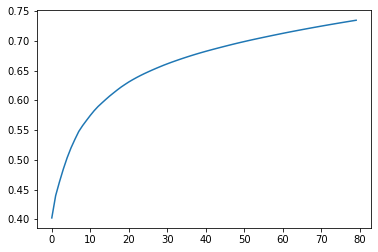

In [17]:
x_reduced = pca.transform(train_features.iloc[:,3:875])

from matplotlib.pyplot import plot
plot(np.cumsum(pca.explained_variance_ratio_))

print("type:", type(x_reduced))
print("shape: ", x_reduced.shape)

pca_train = pd.DataFrame(data=x_reduced)
train_featurePca = pd.concat([train_features.iloc[:,0:3],pca_train],axis=1)

### Create dummies for train data

In [18]:
train_featurePca["cp_time"] = train_featurePca["cp_time"].astype(str)
train_featurePca.dtypes
train_featurePca_dummy = pd.get_dummies(data=train_featurePca,columns=["cp_type","cp_time","cp_dose"],drop_first=True)
train_featurePca_dummy


,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,cp_type_trt_cp,cp_time_48,cp_time_72,cp_dose_D2
0,-10.490392,-0.063998,-4.321139,7.332799,-0.838595,2.789556,-5.685684,3.614436,2.752963,0.883058,...,-0.212731,-0.334560,-2.501003,2.197672,-0.167009,0.434258,1,0,0,0
1,-9.478969,2.888665,9.575525,-1.604311,4.517684,-1.357385,3.411838,0.817121,-0.485952,0.406929,...,-0.433255,-1.024503,0.182286,-0.825071,-0.395551,0.205956,1,0,1,0
2,-2.237833,2.080577,-0.822501,-6.727915,-2.693564,-1.800249,1.877262,0.870649,-1.530095,-1.210864,...,-0.565173,-0.648458,-0.849068,-0.907694,1.306031,1.843888,1,1,0,0
3,16.906488,-3.933496,-1.930869,-7.936851,-15.555561,-3.248818,3.948184,3.140141,1.485148,-0.897293,...,1.039711,1.026074,-0.575323,2.204060,1.520116,-0.335792,1,1,0,0
4,-9.099352,0.664941,8.147066,-6.442203,-4.943394,-0.491650,-3.065457,0.808251,-4.984313,-3.706618,...,-0.655982,1.230085,-0.196963,1.584950,-0.337196,1.141448,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28399,-2.279598,3.249124,-7.211497,-2.061339,2.890795,2.641378,-4.811567,8.905372,8.303502,3.275323,...,-0.920951,0.913443,0.734965,0.484047,0.326795,-0.451905,1,1,0,1
28400,-9.632441,1.399021,-1.981336,1.454390,2.054825,3.928149,2.479611,-2.648616,1.002818,-0.345287,...,1.327859,0.674641,-1.802475,0.753497,0.623459,0.569933,1,0,1,1
28401,-3.764076,-0.071613,-1.978947,-1.543026,-2.020058,1.755357,-2.684234,-1.906502,-3.286189,-0.723547,...,1.279828,-0.669002,-0.574102,-0.647020,-0.078850,0.395166,1,0,1,1
28402,-5.553771,3.176327,1.843490,6.777814,-0.163876,1.173947,-2.436733,0.150891,-0.243772,-3.014773,...,-0.018365,-0.619416,-0.486971,0.196212,-0.105916,0.990923,1,0,0,1


In [19]:
train_featurePca_dummy

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,cp_type_trt_cp,cp_time_48,cp_time_72,cp_dose_D2
0,-10.490392,-0.063998,-4.321139,7.332799,-0.838595,2.789556,-5.685684,3.614436,2.752963,0.883058,...,-0.212731,-0.334560,-2.501003,2.197672,-0.167009,0.434258,1,0,0,0
1,-9.478969,2.888665,9.575525,-1.604311,4.517684,-1.357385,3.411838,0.817121,-0.485952,0.406929,...,-0.433255,-1.024503,0.182286,-0.825071,-0.395551,0.205956,1,0,1,0
2,-2.237833,2.080577,-0.822501,-6.727915,-2.693564,-1.800249,1.877262,0.870649,-1.530095,-1.210864,...,-0.565173,-0.648458,-0.849068,-0.907694,1.306031,1.843888,1,1,0,0
3,16.906488,-3.933496,-1.930869,-7.936851,-15.555561,-3.248818,3.948184,3.140141,1.485148,-0.897293,...,1.039711,1.026074,-0.575323,2.204060,1.520116,-0.335792,1,1,0,0
4,-9.099352,0.664941,8.147066,-6.442203,-4.943394,-0.491650,-3.065457,0.808251,-4.984313,-3.706618,...,-0.655982,1.230085,-0.196963,1.584950,-0.337196,1.141448,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28399,-2.279598,3.249124,-7.211497,-2.061339,2.890795,2.641378,-4.811567,8.905372,8.303502,3.275323,...,-0.920951,0.913443,0.734965,0.484047,0.326795,-0.451905,1,1,0,1
28400,-9.632441,1.399021,-1.981336,1.454390,2.054825,3.928149,2.479611,-2.648616,1.002818,-0.345287,...,1.327859,0.674641,-1.802475,0.753497,0.623459,0.569933,1,0,1,1
28401,-3.764076,-0.071613,-1.978947,-1.543026,-2.020058,1.755357,-2.684234,-1.906502,-3.286189,-0.723547,...,1.279828,-0.669002,-0.574102,-0.647020,-0.078850,0.395166,1,0,1,1
28402,-5.553771,3.176327,1.843490,6.777814,-0.163876,1.173947,-2.436733,0.150891,-0.243772,-3.014773,...,-0.018365,-0.619416,-0.486971,0.196212,-0.105916,0.990923,1,0,0,1


### Scale train data

In [20]:
# Scale the train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_featurePca_dummy.astype(np.float64))

StandardScaler()

In [21]:
train_featurePca_dummy_scaled = scaler.transform(train_featurePca_dummy)
train_featurePca_dummy_scaled.shape

(28404, 84)

# Test data Preprocess

In [22]:
test_features = pd.read_csv("../input/lish-moa/test_features.csv")
test_features = test_features.iloc[:,1:]


### PCA for test data

In [23]:
# PCA transform
x_reduced_test = pca.transform(test_features.iloc[:,3:])
pca_test = pd.DataFrame(data = x_reduced_test)
test_featurePca = pd.concat([test_features.iloc[:,0:3],pca_test],axis =1)

### Create dummies for the test data

In [24]:
test_featurePca.dtypes
test_featurePca["cp_time"] = test_featurePca["cp_time"].astype(str)
test_featurePca_dummy = pd.get_dummies(data = test_featurePca, columns=["cp_type","cp_time","cp_dose"],drop_first=True)
test_featurePca_dummy

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,cp_type_trt_cp,cp_time_48,cp_time_72,cp_dose_D2
0,-5.361024,2.946534,1.140744,-2.106601,-2.044023,1.068858,-0.197225,0.367186,-1.780903,-0.701484,...,-1.916887,-0.337381,0.580855,-0.766424,0.557113,-0.958773,1,0,0,0
1,-1.387174,-1.669281,-2.598822,7.055956,-3.281786,-0.049099,-10.259127,-0.679032,-0.492550,0.149352,...,1.209771,-0.175202,-1.215234,-1.222300,-0.490739,0.620143,1,0,1,0
2,-10.253435,2.013260,-2.301874,4.902657,2.466553,4.617936,5.401884,-4.550792,1.984596,2.024779,...,1.311934,0.375969,1.145915,1.842783,1.327037,-0.187877,0,0,0,0
3,-4.036481,0.738458,-5.997352,4.888970,1.930867,1.120969,0.712091,-1.930831,2.760026,1.877284,...,0.314923,-0.451041,-1.082371,0.818849,0.119017,-1.005452,1,0,0,1
4,-12.484955,1.514295,3.956225,0.250201,2.454780,0.167932,5.519488,-1.911880,1.166271,0.627083,...,-2.010369,-1.408975,0.729024,-0.498887,-0.917553,0.266732,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,2.095223,4.541072,-1.105335,-1.186600,-1.750047,-0.641558,-0.222667,-2.228815,1.924789,3.249809,...,1.137531,-0.223629,-0.551843,-0.836121,-1.183590,-0.461849,1,0,0,0
3978,-12.226481,1.783922,3.642874,-0.831694,-1.508987,-0.343956,1.415986,-0.583787,-1.756818,-3.438123,...,0.699989,-0.097990,0.052166,0.387469,0.233701,0.076962,1,0,0,0
3979,-10.960775,-0.404105,1.296252,5.460592,-0.535021,-0.771319,-5.878798,1.856617,1.368372,1.818802,...,-0.899693,0.856840,-0.273116,0.549324,-0.368492,0.066108,1,0,1,0
3980,-6.369159,0.413797,-10.587554,-5.803092,1.541968,6.413367,1.836062,-2.892258,0.937469,0.937366,...,0.074684,0.360093,1.032689,-0.104563,-1.791861,-0.680554,1,1,0,1


In [25]:
test_feature_Pca_dummy_scaled = scaler.transform(test_featurePca_dummy)

In [26]:
test_feature_Pca_dummy_scaled.shape

(3982, 84)

# Model

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
import random


# Create K-fold split

In [28]:
def kfoldSplit(k=5, data=train_featurePca_dummy_scaled):
   
    """ Creates train and validation indicies for kfold cross validation"""
    
    global val_indicies
    val_indicies = []
    global train_kouvas
    train_kouvas=[]
    
    indicies = list(np.arange(data.shape[0]))
    fold_div =data.shape[0]//k
    indices_sample=random.sample(indicies,data.shape[0])
   
    # Create Validation indicies ------------------------------------
    for f in range(0,k,1):
        print("f :",f,"k :", f+1)
        if f<=0:
            val_indicies.append(indices_sample[0:fold_div*(f+1)])
        else:
            val_indicies.append(indices_sample[(f*fold_div)+1:fold_div*(f+1)])

    print('------------------------------------------------------')
    
    # Create Train Indicies-------------------------------
    for f in range(0,k,1):
        train_indicies = indices_sample
        print("f :",f,"k :", f+1)
        # items to be removed 
        unwanted_num = val_indicies[f] 
        train_indicies = [ele for ele in train_indicies if ele not in unwanted_num] 
        train_kouvas.append(train_indicies)  
   
    
        
    print("val_indicies list of :",len(val_indicies))
    print("train_kouvas list of :", len(train_kouvas))
    
    

In [29]:
k = 20

kfoldSplit(k = k)

f : 0 k : 1
f : 1 k : 2
f : 2 k : 3
f : 3 k : 4
f : 4 k : 5
f : 5 k : 6
f : 6 k : 7
f : 7 k : 8
f : 8 k : 9
f : 9 k : 10
f : 10 k : 11
f : 11 k : 12
f : 12 k : 13
f : 13 k : 14
f : 14 k : 15
f : 15 k : 16
f : 16 k : 17
f : 17 k : 18
f : 18 k : 19
f : 19 k : 20
------------------------------------------------------
f : 0 k : 1
f : 1 k : 2
f : 2 k : 3
f : 3 k : 4
f : 4 k : 5
f : 5 k : 6
f : 6 k : 7
f : 7 k : 8
f : 8 k : 9
f : 9 k : 10
f : 10 k : 11
f : 11 k : 12
f : 12 k : 13
f : 13 k : 14
f : 14 k : 15
f : 15 k : 16
f : 16 k : 17
f : 17 k : 18
f : 18 k : 19
f : 19 k : 20
val_indicies list of : 20
train_kouvas list of : 20


In [30]:
# Features --------------
train_featurePca_dummy_scaled[val_indicies[1],]
train_featurePca_dummy_scaled[train_kouvas[1],]

array([[-0.04922559,  0.56406334, -0.29627645, ...,  1.37491963,
        -0.69749394,  1.01948281],
       [-0.16575589,  0.60867706,  0.05382338, ...,  1.37491963,
        -0.69749394, -0.98088951],
       [-0.45578153,  0.22922261,  0.06247038, ..., -0.72731524,
        -0.69749394, -0.98088951],
       ...,
       [-0.20049778, -0.75945762, -0.84218198, ..., -0.72731524,
        -0.69749394,  1.01948281],
       [-0.37088371,  0.56216807,  1.72322451, ..., -0.72731524,
        -0.69749394, -0.98088951],
       [ 0.25111992, -0.88249751, -0.88315296, ..., -0.72731524,
        -0.69749394,  1.01948281]])

In [31]:
# Labels ----------------
train_labels.values[val_indicies[1],]
train_labels.values[train_kouvas[1],]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Create Model

In [32]:
units = 256
optmz = "adamax"
epochs = 100
batch = 64
lr_rate = 0.1

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor= lr_rate,
                              patience=5)#, min_lr=0.001)
early_stop = EarlyStopping(monitor="val_loss", patience=20)

callback_list = [reduce_lr,early_stop]

In [33]:

model = Sequential(
[
layers.Dense(units, activation = 'relu', input_shape=(train_featurePca_dummy_scaled.shape[1],)),
layers.Dropout(rate =0.5),
layers.Dense(units, activation = 'relu'), 
layers.Dropout(rate =0.5),
layers.Dense(units = train_labels.shape[1], activation = 'sigmoid')
]    
    
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               21760     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 206)               52942     
Total params: 140,494
Trainable params: 140,494
Non-trainable params: 0
_________________________________________________________________


processing fold # 1


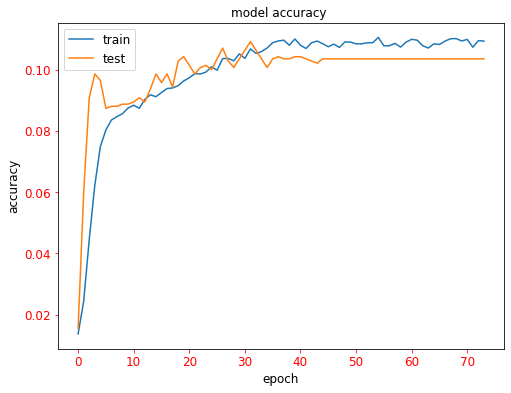

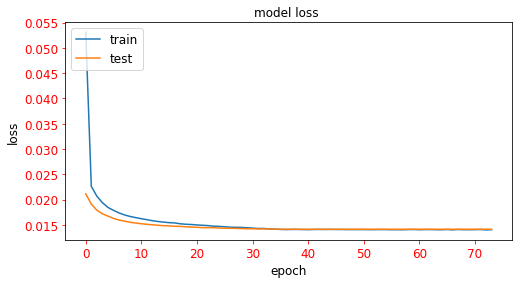

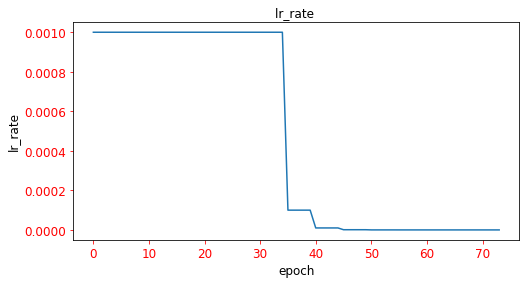

train data shape:  (26984, 84)
vaidation data shape:  (1420, 84)
min loss in fold # 1 ---  0.01413
average loss in fold # 1 ---  0.01466
processing fold # 2


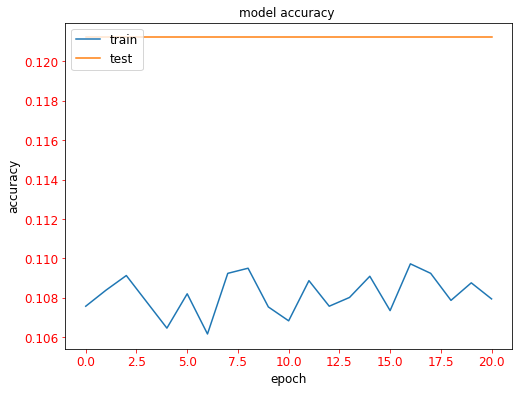

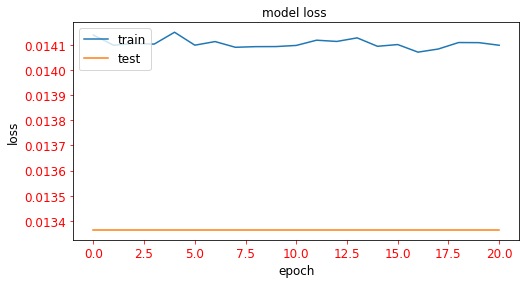

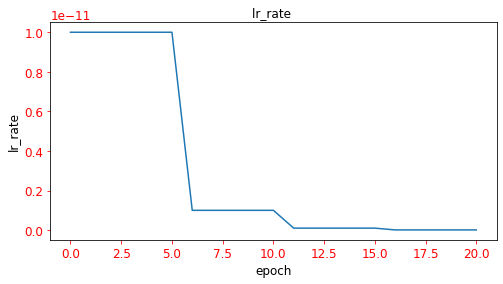

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 2 ---  0.01336
average loss in fold # 2 ---  0.01437
processing fold # 3


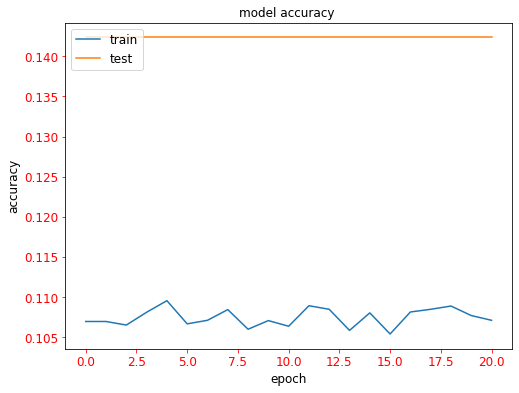

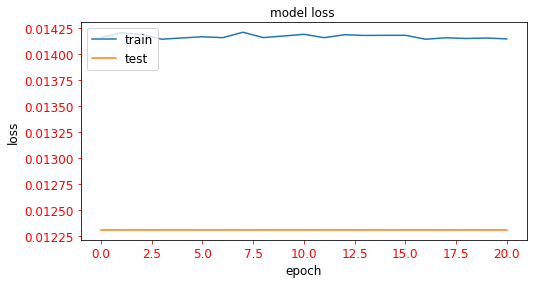

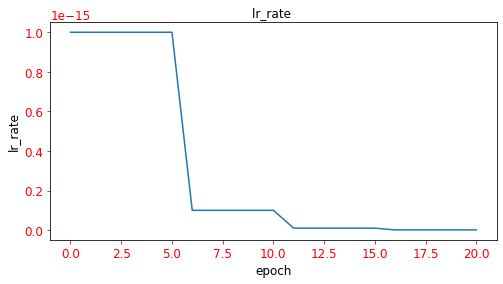

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 3 ---  0.01231
average loss in fold # 3 ---  0.014
processing fold # 4


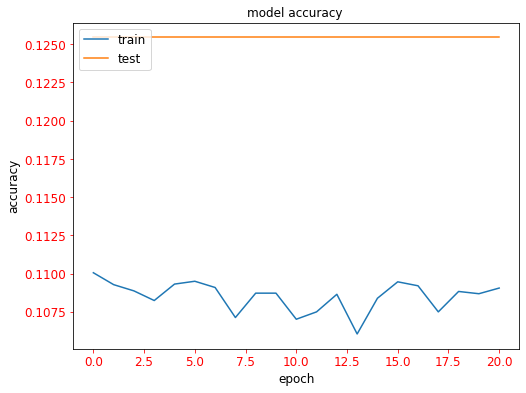

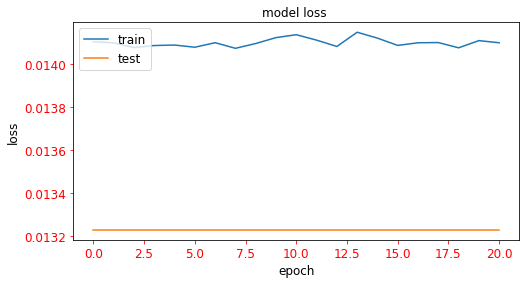

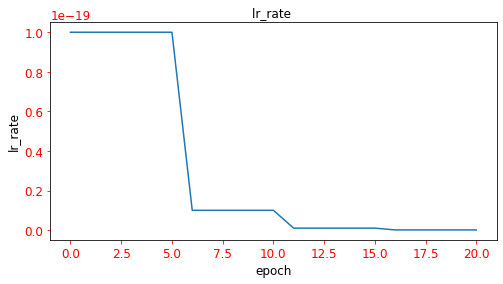

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 4 ---  0.01231
average loss in fold # 4 ---  0.01388
processing fold # 5


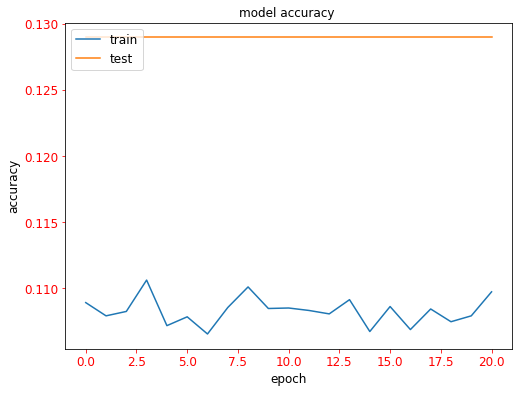

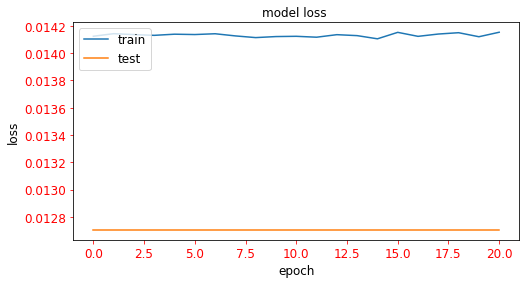

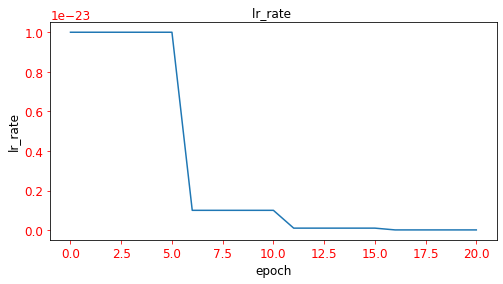

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 5 ---  0.01231
average loss in fold # 5 ---  0.01372
processing fold # 6


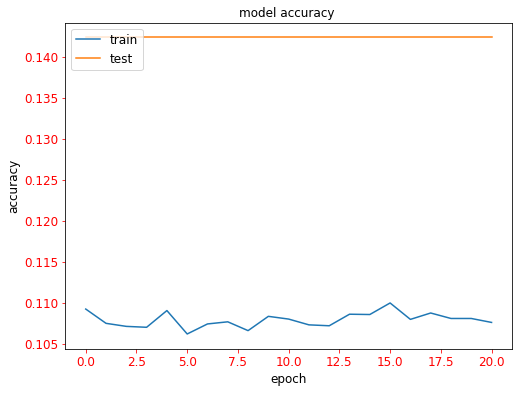

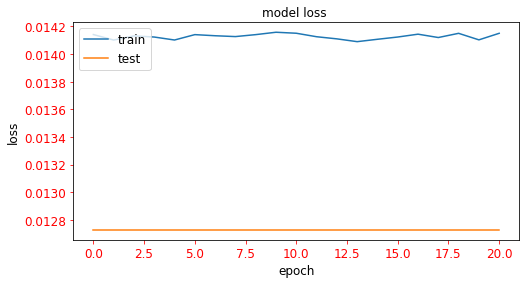

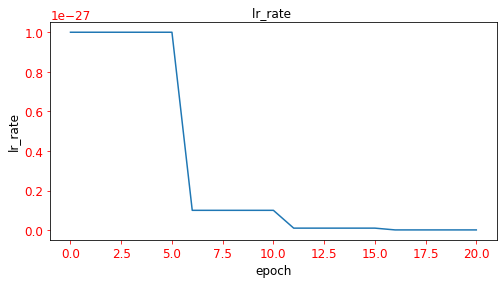

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 6 ---  0.01231
average loss in fold # 6 ---  0.01361
processing fold # 7


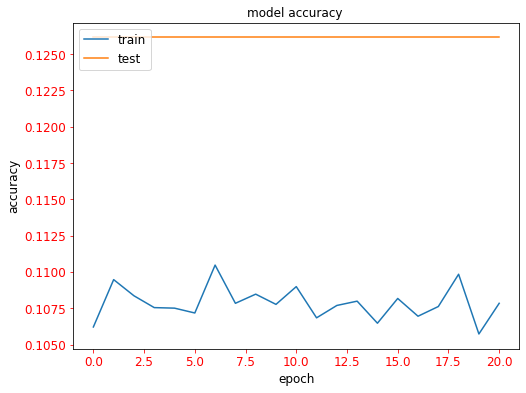

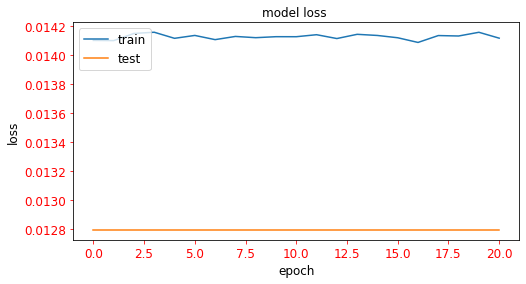

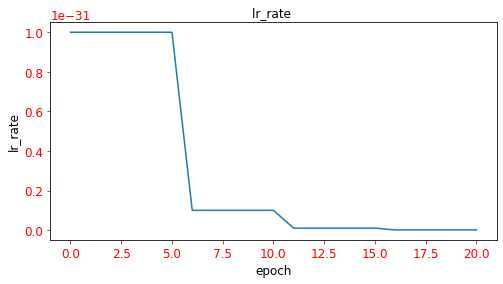

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 7 ---  0.01231
average loss in fold # 7 ---  0.01352
processing fold # 8


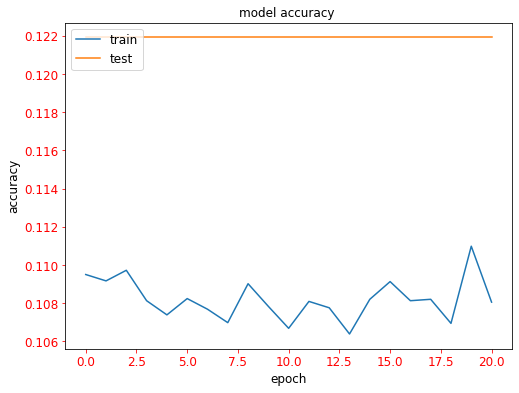

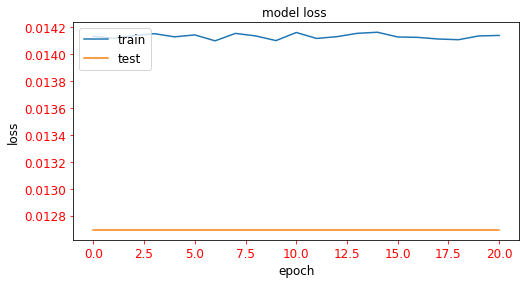

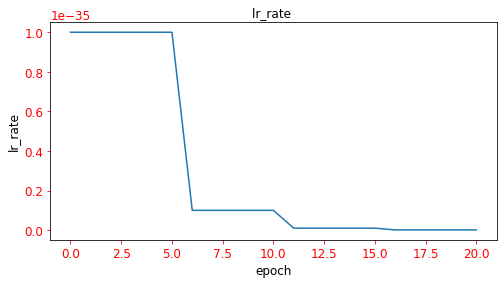

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 8 ---  0.01231
average loss in fold # 8 ---  0.01344
processing fold # 9


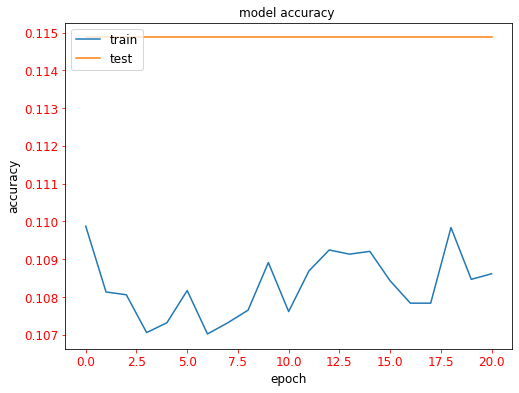

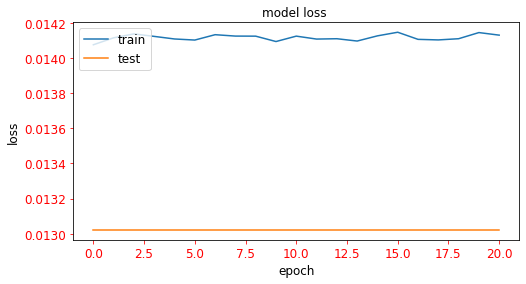

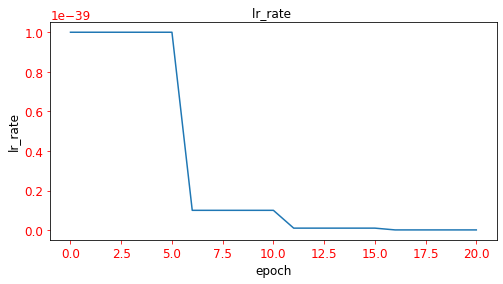

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 9 ---  0.01231
average loss in fold # 9 ---  0.01341
processing fold # 10


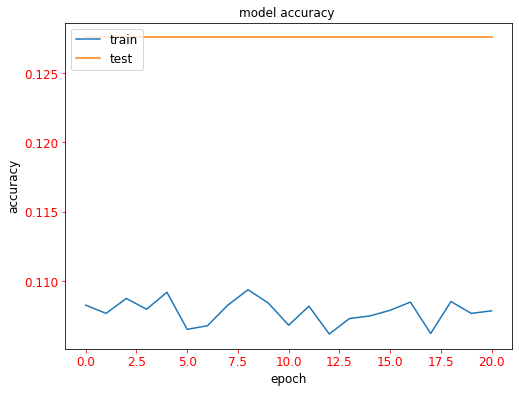

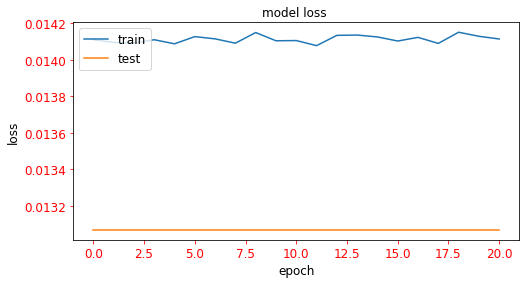

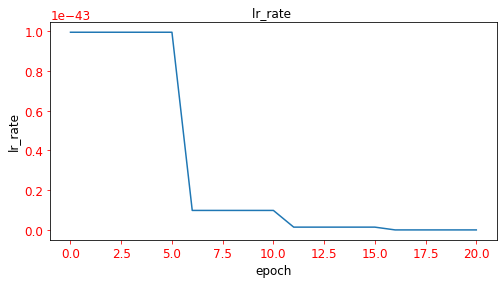

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 10 ---  0.01231
average loss in fold # 10 ---  0.01338
processing fold # 11


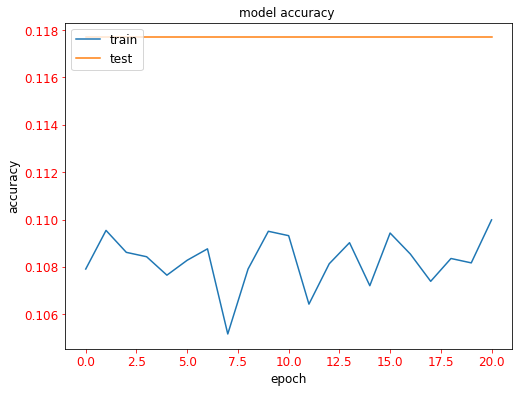

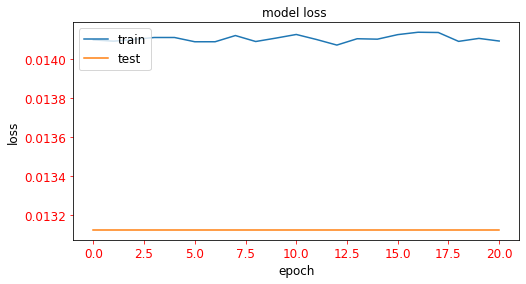

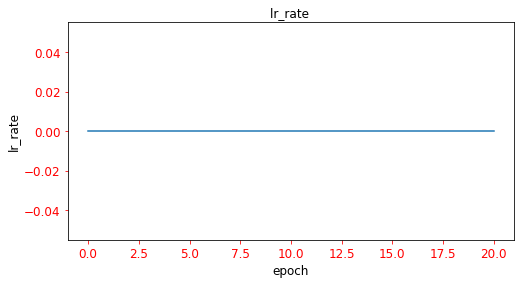

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 11 ---  0.01231
average loss in fold # 11 ---  0.01336
processing fold # 12


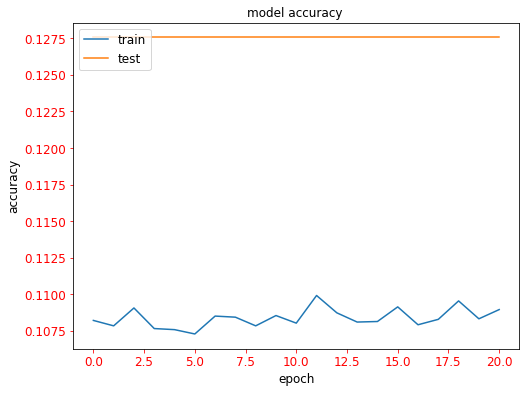

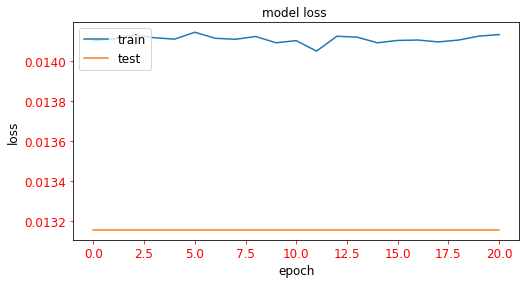

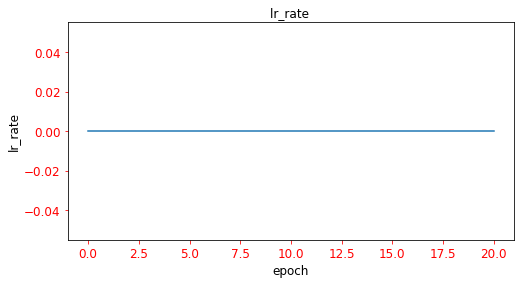

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 12 ---  0.01231
average loss in fold # 12 ---  0.01335
processing fold # 13


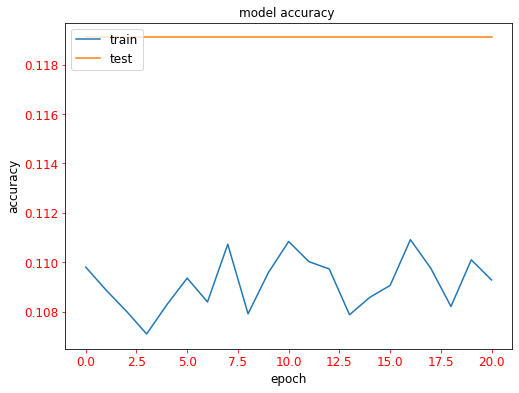

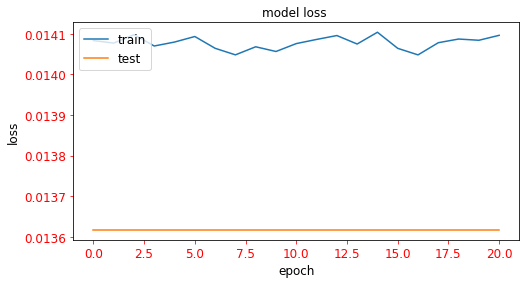

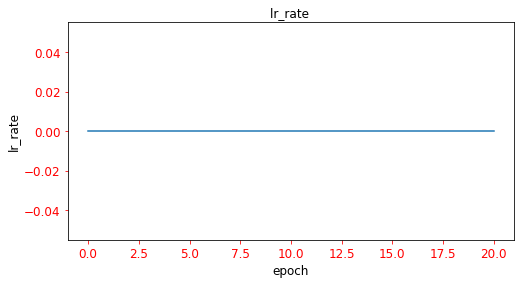

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 13 ---  0.01231
average loss in fold # 13 ---  0.01336
processing fold # 14


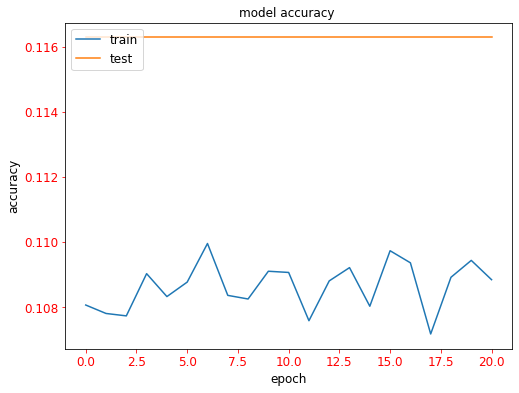

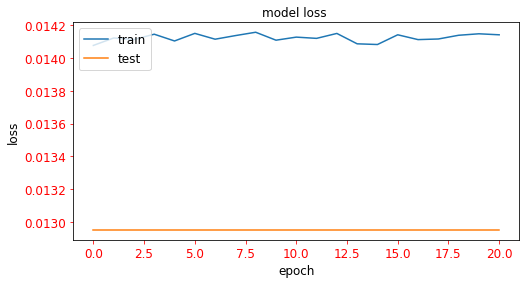

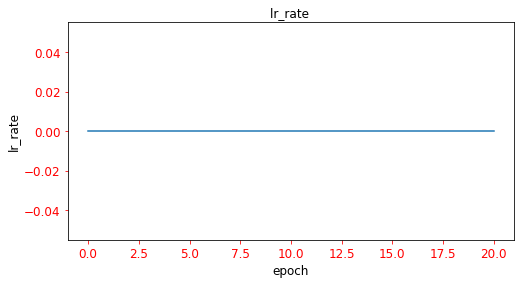

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 14 ---  0.01231
average loss in fold # 14 ---  0.01334
processing fold # 15


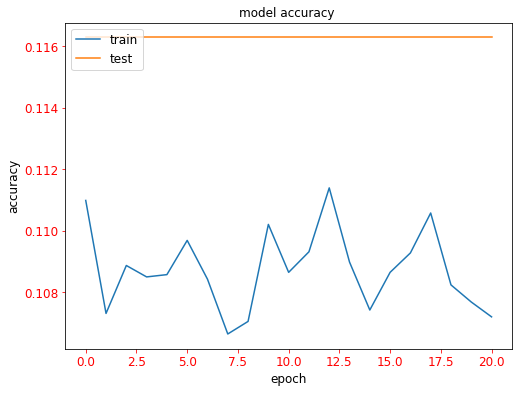

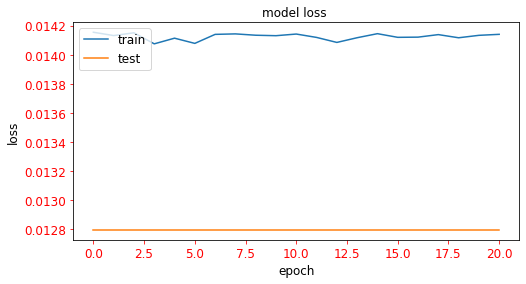

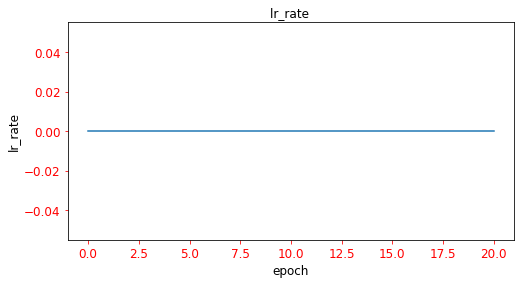

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 15 ---  0.01231
average loss in fold # 15 ---  0.01331
processing fold # 16


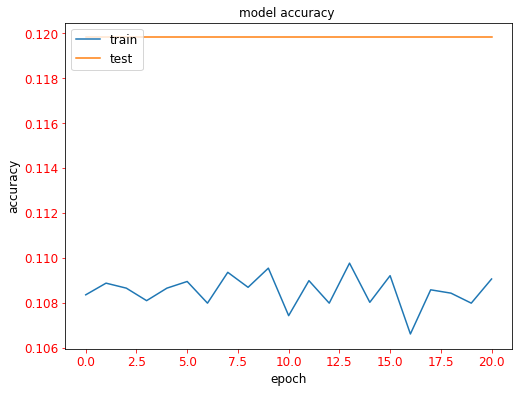

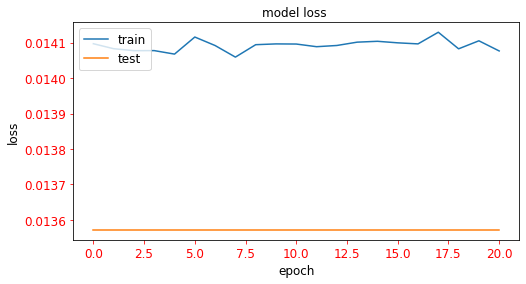

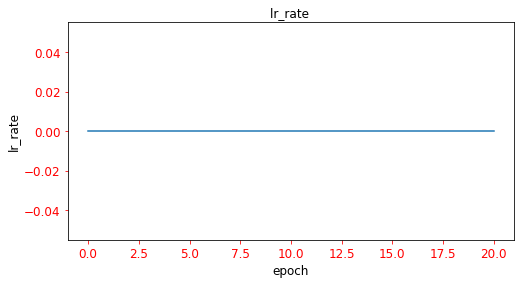

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 16 ---  0.01231
average loss in fold # 16 ---  0.01332
processing fold # 17


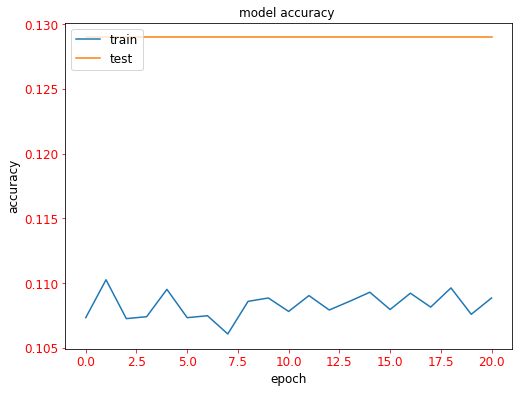

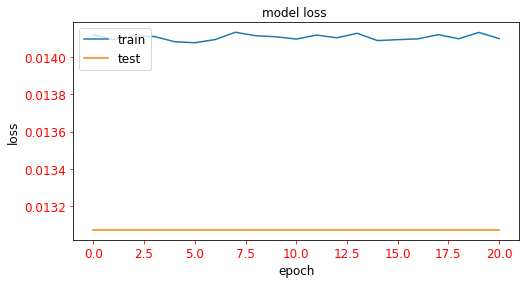

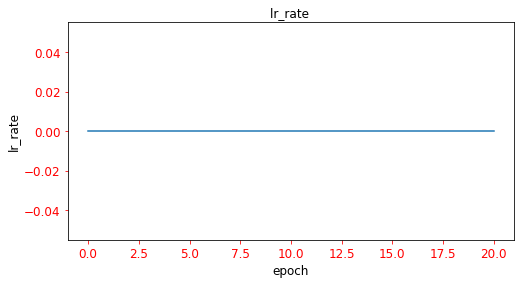

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 17 ---  0.01231
average loss in fold # 17 ---  0.01331
processing fold # 18


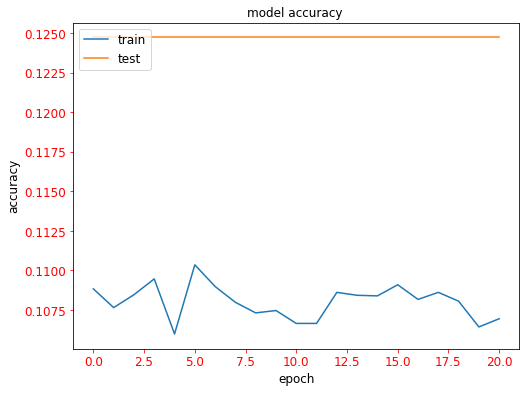

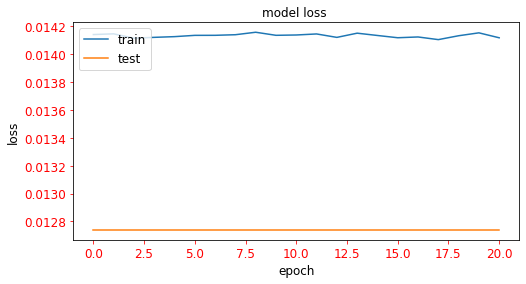

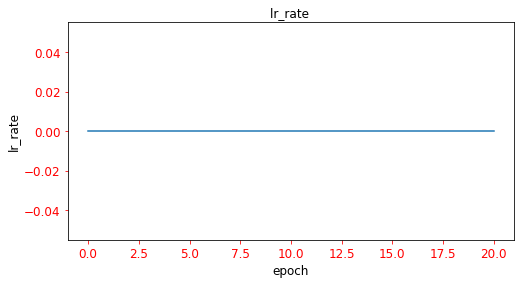

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 18 ---  0.01231
average loss in fold # 18 ---  0.01328
processing fold # 19


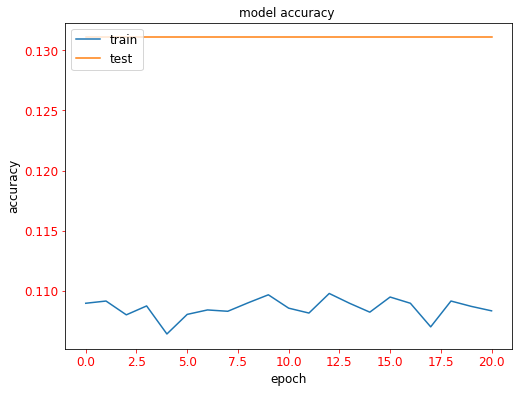

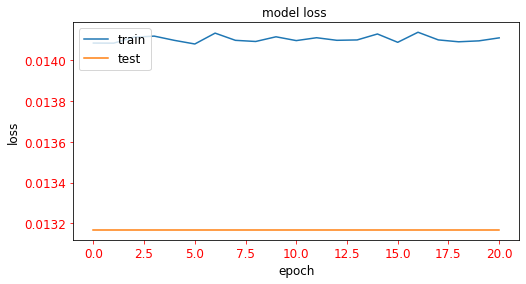

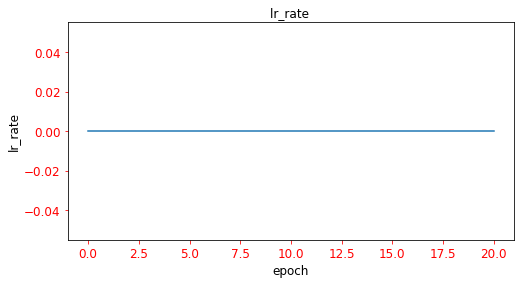

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 19 ---  0.01231
average loss in fold # 19 ---  0.01328
processing fold # 20


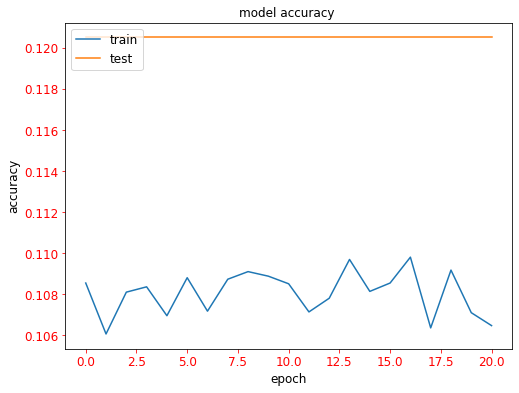

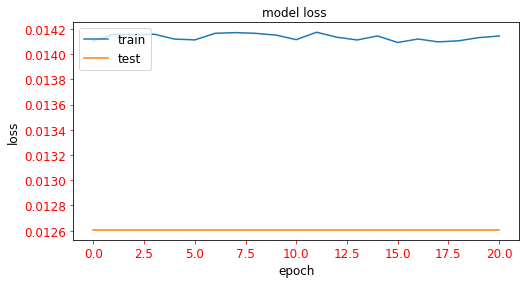

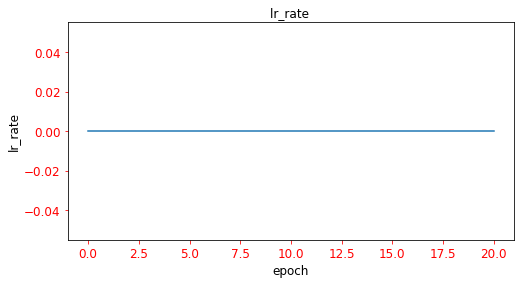

train data shape:  (26985, 84)
vaidation data shape:  (1419, 84)
min loss in fold # 20 ---  0.01231
average loss in fold # 20 ---  0.01325


In [34]:
model.compile(
    optimizer = optmz,
    loss = "binary_crossentropy",
    metrics = ["accuracy"])



all_val_loss = pd.DataFrame()
all_accuracy = pd.DataFrame()



for i in range(0,k,1):
    print("processing fold #", i+1)
    
    history = model.fit(
         train_featurePca_dummy_scaled[train_kouvas[i],],
         train_labels.values[train_kouvas[i],],
         epochs = epochs,
         batch_size = batch,
         callbacks = callback_list,
         validation_data=(train_featurePca_dummy_scaled[val_indicies[i],],
                      train_labels.values[val_indicies[i],]),
         verbose = 0
    
    )
     
    # Plot training and validation----------
    # Accuracy
    
    BIGGER_SIZE = 12
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)
    plt.rc_context({'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'})

    
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Loss ----------------

    BIGGER_SIZE = 12
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)
    plt.rc_context({'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'})

    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss ')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # lr_rate ----------------

    BIGGER_SIZE = 12
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)
    plt.rc_context({'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'})

    plt.figure(figsize=(8,4))
    plt.plot(history.history['lr'])
    plt.title('lr_rate ')
    plt.ylabel('lr_rate')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    
    val_loss = pd.DataFrame(data= {'fold':i+1,'val_loss':history.history["val_loss"],'lr_rate':history.history['lr']})
    all_val_loss = pd.concat([all_val_loss,val_loss])
        
    val_accuracy = pd.DataFrame(data={'fold':i+1,'val_accuracy':history.history["val_accuracy"],'lr_rate':history.history['lr']}) 
    all_accuracy = pd.concat([all_accuracy, val_accuracy])
    
    print("train data shape: ",train_featurePca_dummy_scaled[train_kouvas[i],].shape)
    print("vaidation data shape: ",train_featurePca_dummy_scaled[val_indicies[i],].shape)
    #print(all_val_loss)
    print("min loss in fold #",i+1,"--- ",round(all_val_loss['val_loss'].min(),5))
    print("average loss in fold #",i+1,"--- ",round(all_val_loss['val_loss'].mean(),5))
    
    

In [35]:
average_perfmoramnce = pd.DataFrame(data = {'epochs':range(0,all_val_loss.shape[0]),
                                           'validation_loss':all_val_loss['val_loss'].mean(),
                                           'validation_accuracy':all_accuracy['val_accuracy'].mean()} )

In [36]:
average_perfmoramnce.iloc[1,1:]

validation_loss        0.013247
validation_accuracy    0.120870
Name: 1, dtype: float64

In [37]:
print(history.history.keys())
print("best val_loss:", round(np.min(history.history["val_loss"]),6))
print("best loss:", round(np.min(history.history["loss"]),6))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])
best val_loss: 0.012606
best loss: 0.014092


# TEST - SUBMISSION

In [38]:
predict_test = model.predict_proba(test_feature_Pca_dummy_scaled)


In [39]:
predict_test.shape

(3982, 206)

In [40]:
colnames = (sample_submission.iloc[:,1:].columns)
predict_dataFrame = pd.DataFrame(data = predict_test)
predict_dataFrame.columns = colnames
predict_dataFrame.shape

(3982, 206)

In [41]:
type(predict_dataFrame)
#type(colnames)

pandas.core.frame.DataFrame

In [42]:
test_features = pd.read_csv("../input/lish-moa/test_features.csv")

In [43]:
sig_id = test_features[['sig_id']]
type(sig_id)

pandas.core.frame.DataFrame

In [44]:
submission = pd.concat([sig_id,predict_dataFrame],axis = 1)
submission.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.001142,1.866728e-03,0.001039,0.010395,0.016611,0.004836,0.003154,0.004341,4.927814e-04,...,3.809035e-04,6.244481e-04,0.002341,3.078669e-03,9.090006e-04,6.755292e-04,2.309263e-03,0.001860,0.002293,0.001714
1,id_001897cda,0.000231,3.807247e-04,0.000674,0.001427,0.002874,0.001550,0.001847,0.004097,1.184642e-02,...,1.128803e-04,3.387034e-04,0.001803,1.592636e-04,1.020980e-01,1.660585e-04,9.249270e-02,0.001595,0.000455,0.002966
2,id_002429b5b,0.000001,1.563101e-07,0.000001,0.001231,0.000680,0.000010,0.000031,0.000009,8.528987e-08,...,5.805313e-08,4.263654e-08,0.000006,2.271760e-07,9.106396e-07,5.117240e-09,4.153738e-07,0.000006,0.000003,0.000017
3,id_00276f245,0.000256,6.059408e-04,0.001898,0.025111,0.014411,0.001910,0.005357,0.005789,2.002418e-04,...,3.795028e-04,5.712807e-04,0.004053,1.487705e-02,6.124556e-03,1.546144e-04,3.494740e-03,0.002887,0.001715,0.007241
4,id_0027f1083,0.003240,2.450019e-03,0.001490,0.020083,0.034582,0.006003,0.005393,0.004066,1.057703e-04,...,3.140569e-04,7.351935e-04,0.002475,3.955215e-03,1.091450e-03,3.958642e-04,1.721233e-03,0.001427,0.001165,0.002202


In [45]:

print(submission.shape)
submission.to_csv("submission.csv",index = False)

(3982, 207)
